# Simulation of a Single Qubit Driven by a Harmonic External Field

This notebook explores the dynamics of a single qubit under the influence of a harmonic external field within the framework of the Rotating Wave Approximation (RWA). The simulation demonstrates the qubit's evolution, highlighting key phenomena such as Rabi oscillations and the effects of detuning.

In [1]:
# from qutip.ipynbtools import version_table; version_table()
from qutip import basis, sigmax, sigmaz, sigmay, identity, Bloch
from qutip import mesolve, Options, Qobj
from math import pi, sqrt, sin, cos
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

from IPython.display import display, display_latex
from IPython.display import HTML

# constants
hbar = 1.0

In [7]:
def H_RWA(w_q, w_d, W_d, phi):
    """
    RWA Hamiltonian for the driven two-level system.
    """

    H = 0.5 * hbar * (w_q - w_d) * sigmaz() + hbar * W_d * (cos(phi) * sigmax() + sin(phi) * sigmay())

    return H


display(H_RWA(1.0, 2.0, 0.5, 0.0))

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=CSR, isherm=True
Qobj data =
[[-0.5  0.5]
 [ 0.5  0.5]]

c:\Users\yehan\Documents\Programming\Quantum-Simulations\.venv\Lib\site-packages\qutip\solver\options.py:16: FutureWarning: Dedicated options class are no longer needed, options should be passed as dict to solvers.
  warnings.warn(
c:\Users\yehan\Documents\Programming\Quantum-Simulations\.venv\Lib\site-packages\qutip\solver\solver_base.py:479: FutureWarning: "progress_bar" is now included in options:
 Use `options={"progress_bar": False / True / "tqdm" / "enhanced"}`
  warnings.warn(


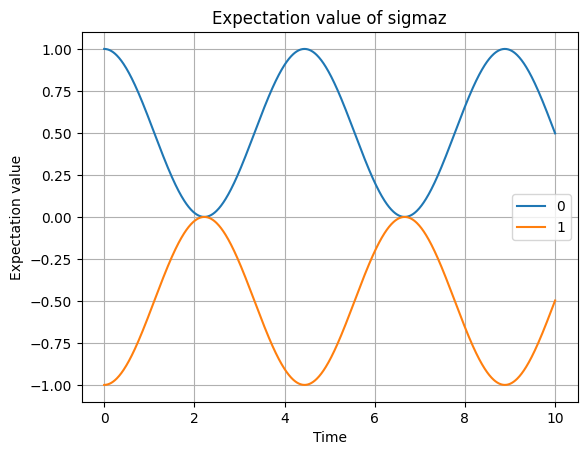

In [32]:
H = H_RWA(1.0, 2.0, 0.5, 0.0)

time_points = np.linspace(0, 10, 1000)

psi0 = basis(2, 0)  # Initial state |0>

output_1 = mesolve(
    H,               # Hamiltonian
    psi0,     # Initial state |0>
    time_points,  # Time points
    e_ops=[sigmaz()],
    progress_bar=False,
    options=Options(nsteps=1000)
)

psi1 = basis(2, 1)  # Initial state |1>

output_2 = mesolve(
    H,               # Hamiltonian
    psi1,     # Initial state |1>
    time_points,  # Time points
    e_ops=[sigmaz()],
    progress_bar=False,
    options=Options(nsteps=1000)
)


plt.title("Expectation value of sigmaz")
plt.plot(output.times, output_1.expect[0], label="0")
plt.plot(output.times, output_2.expect[0], label="1")
plt.xlabel("Time")
plt.ylabel("Expectation value")
plt.grid()
plt.legend()
plt.show()